# Importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading Dataset

df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.shape

(614, 13)

So, there are 614 rows and 13 columns in the above dataset

# Preprocessing of DataSet

In [6]:
#looking for any null value present in the dataset

df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
#Finding sum of null values in each column

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Filling the null values for numerical data

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
# Fill the missing values for categorical terms - mode

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Lets separate the categorical and numerical columns 

txt_data = []
num_data = []

for i,t in enumerate(df.dtypes):
    if t == object:
        txt_data.append(df.iloc[:, i])
    else:
        num_data.append(df.iloc[:, i])


In [12]:
# Converting them into dataframe

txt_data = pd.DataFrame(txt_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [13]:
# Numerical Data

num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0


In [14]:
num_data.isnull().sum().any()

False

In [15]:
# Categorical Data

txt_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [16]:
txt_data.isnull().sum().any()

False

In [17]:
# Dropping the ID Column from cat_data
txt_data.drop('Loan_ID', axis = 1, inplace = True)


# Exploratory Data Analysis

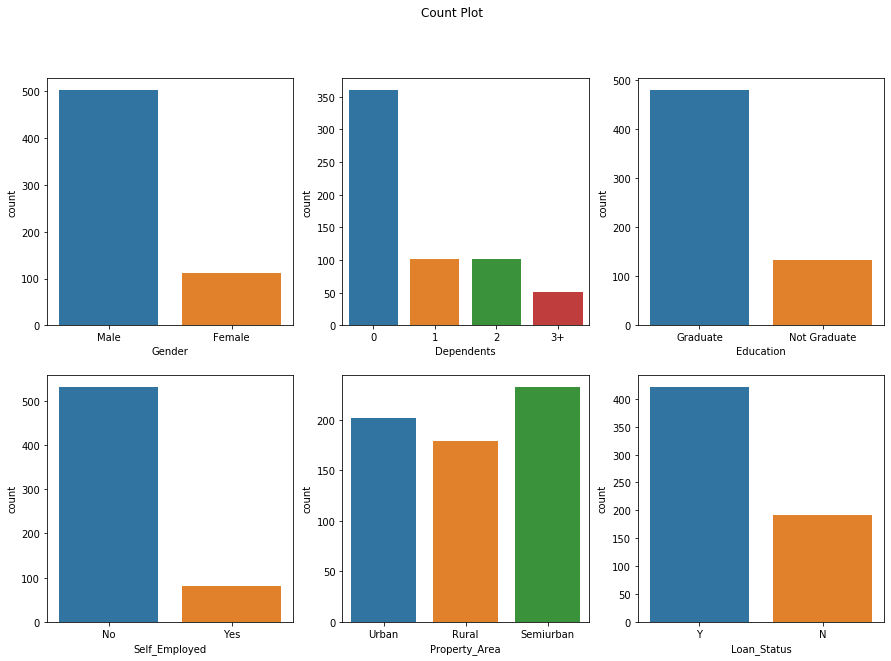

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

fig.suptitle('Count Plot')
sns.countplot(df['Gender'],ax=axes[0, 0])
sns.countplot(df['Dependents'],ax=axes[0, 1])
sns.countplot(df['Education'],ax=axes[0, 2])
sns.countplot(df['Self_Employed'],ax=axes[1, 0])
sns.countplot( df['Property_Area'],ax=axes[1, 1])
sns.countplot(df['Loan_Status'],ax=axes[1, 2])


# Number Atributes Visualization

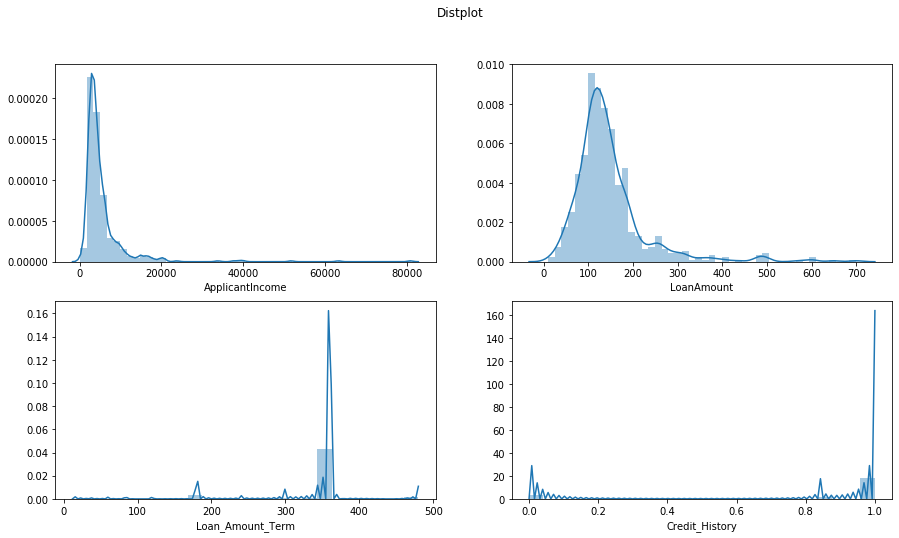

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Distplot')
sns.distplot(df['ApplicantIncome'],ax=axes[0, 0])
sns.distplot(df['LoanAmount'],ax=axes[0, 1])
sns.distplot(df['Loan_Amount_Term'],ax=axes[1, 0])
sns.distplot(df['Credit_History'],ax=axes[1, 1])

# Corr Matrix

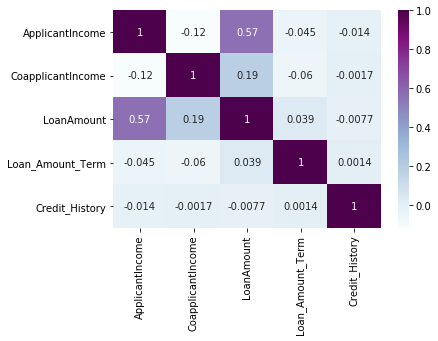

In [20]:
corr = df.corr()
sns.heatmap(corr,annot=True, cmap='BuPu')


# Label Encoding

In [21]:
LE = LabelEncoder()

In [22]:
# Transforming_Categorical_Columns

for i in txt_data:
    txt_data[i] = LE.fit_transform(txt_data[i])

In [23]:
txt_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [24]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0


In [25]:
# concating both numerical & categorical column

df = pd.concat([txt_data, num_data], axis = 1)

In [26]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.000000,360.0,1.0


In [27]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# Data Modeling

In [28]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [29]:
# Splitting the Data into train-test split

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)


In [30]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [31]:
# Using the various model for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = {
    'LogisticRegression' : LogisticRegression(random_state = 42),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'SVC' : SVC(random_state = 42),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth = 5, random_state = 42)
}

In [40]:
# Building the Functions

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    precision_S = precision_score(y_true, y_pred)
    recall_S = recall_score(y_true, y_pred)
    f1_S = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    accuracy_S = accuracy_score(y_true, y_pred)
    
    if retu:
        return precision_S, recall_S, f1_S, loss, accuracy_S
    else:
        print('  pre: %.4f\n  rec: %.4f\n  f1: %.4f\n  loss: %.4f\n  acc: %.4f' % (precision_S, recall_S, f1_S, loss, accuracy_S))

In [41]:
# Evaluating the model

def train_evaluation(models, X, y):
    for name, model in models.items():
        print(name, ':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('#'*40)

In [42]:
train_evaluation(models, X_train, y_train)

LogisticRegression :
  pre: 0.8014
  rec: 0.9795
  f1: 0.8816
  loss: 6.3311
  acc: 0.8167
########################################
KNeighborsClassifier :
  pre: 0.8262
  rec: 0.9591
  f1: 0.8877
  loss: 5.8386
  acc: 0.8310
########################################
SVC :
  pre: 0.8140
  rec: 0.9854
  f1: 0.8915
  loss: 5.7683
  acc: 0.8330
########################################
DecisionTreeClassifier :
  pre: 0.8284
  rec: 0.9883
  f1: 0.9013
  loss: 5.2056
  acc: 0.8493
########################################


In [43]:
# Usingthe Stratified K Fold to split the model

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)

def train_evaluation(models, X, y, folds):
    # Since (iloc don't work on numpy array) we will change X & y to dataframe because we will use iloc
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name, ':')
        
        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train])
            y_pred = model.predict(X.iloc[test])
            ls.append(loss(y.iloc[test], y_pred, retu = True))
            
        print(pd.DataFrame(np.array(ls).mean(axis = 0), index = idx)[0])
        
        print('#'*40)

In [44]:
train_evaluation(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.800572
 rec     0.979412
 f1      0.880573
 loss    6.406610
 acc     0.814514
Name: 0, dtype: float64
########################################
KNeighborsClassifier :
 pre     0.803302
 rec     0.935462
 f1      0.863422
 loss    7.110124
 acc     0.794145
Name: 0, dtype: float64
########################################
SVC :
 pre     0.800866
 rec     0.970588
 f1      0.877170
 loss    6.547583
 acc     0.810432
Name: 0, dtype: float64
########################################
DecisionTreeClassifier :
 pre     0.797495
 rec     0.953109
 f1      0.867818
 loss    6.966277
 acc     0.798310
Name: 0, dtype: float64
########################################


### LogisticRegression Classifier is the best model for the given dataset with highest accuracy of 81.4%